# Dissecting the code: Seaborn heatmap

## Importing the library

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the data from seaborn pre-instored datasets

In [2]:
df = pd.read_csv(r'E:\PY\6.0 Correlation Analysis\obesity_2018_sentimentscores_2019_state.csv')
df

,state,obesity number,joy,anger,anticipation,disgust,fear,sadness,surprise,trust,negative,positive
0,Alabama,1321625,922,500,1014,809,777,909,578,943,1333,1752
1,Alaska,154408,184,77,180,120,117,121,109,210,231,364
2,Arizona,1404408,1755,962,1822,1475,1431,1570,942,1956,2677,3499
3,Arkansas,818396,429,187,447,314,306,335,203,409,504,753
4,California,7221318,13900,7058,14225,10697,10322,11402,7210,14662,19255,26957
5,Colorado,872799,1275,500,1308,826,776,948,598,1279,1598,2457
6,Connecticut,756107,841,468,912,797,774,972,449,1005,1410,1736
7,Delaware,231940,282,131,281,199,209,202,140,283,380,514
8,District of Columbia,123662,1010,527,1070,852,844,966,510,1141,1567,2139
9,Florida,4539244,5588,2663,5634,4277,4054,4572,2813,5799,7741,10764


In [3]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)

<AxesSubplot:>

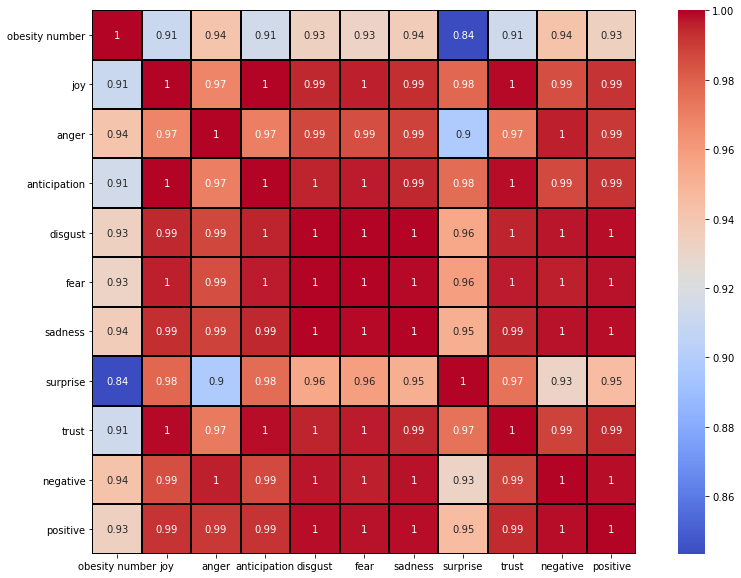

In [4]:
# plt.figure(figsize=(15, 10))
#matrix = np.ones_like(new_df.corr())

sns.heatmap(df.corr(), annot = True,square=True,cmap= 'coolwarm', linewidths=1,linecolor='black')

There are about 18 arguments in the seaborn heatmap function

#### Doing a basic correlation matrix of your data frame

<AxesSubplot:>

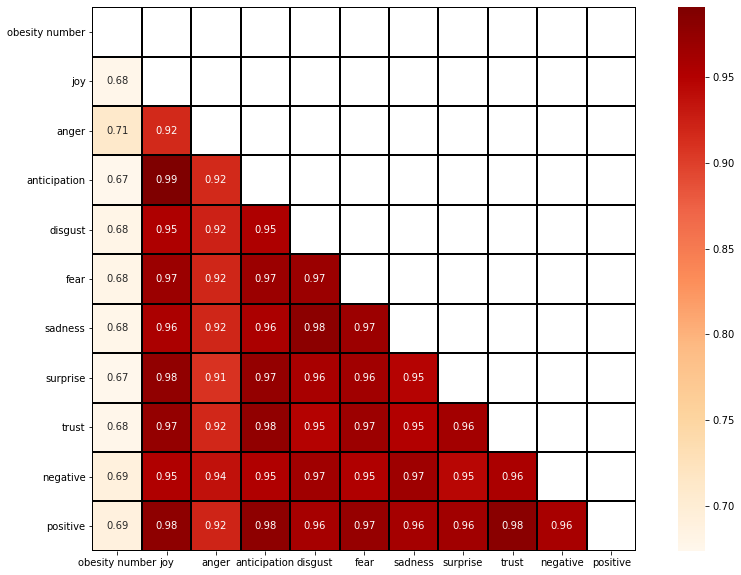

In [22]:
mask = np.triu(df.corr())
sns.heatmap(df.corr(method= 'kendall'), annot = True,square=True,cmap= 'OrRd', linewidths=1,linecolor='black',mask=mask)

#### and using the annotation argument

In [ ]:
#and using the annotation argument
sns.heatmap(tips_df.corr(), annot=True)

## Understanding the data component

In [ ]:
tips_df.info()

## Data Cleaning & Feature Engineering
- Changing the data types
- Checking the categories to a dummy variable so as to get only numeric vaules

 Selecting all the category columns 

In [ ]:
cat_list = tips_df.select_dtypes(include='category').columns.to_list()
cat_list

Putting all the category columns in a list(using list comprehension except the day column because it has more than two unique variables.

In [ ]:
new_cat = [i for i in cat_list if not i == 'day']
new_cat

To create a list of lists for each of the variables in each category column

In [ ]:
great_list = []
for i in new_cat:
  new_list = tips_df[i].unique().to_list()
  great_list.append(new_list)

great_list

Using a for-loop to create a new column  that has the binary numbers (dummy variables of all the columns in the new_cat list.

In [ ]:
count = 0
for i in new_cat:
    tips_df[i+'_num'] = np.where(tips_df[i] == great_list[count][0], 0, 1)
    count += 1

Overview of the information again

In [ ]:
tips_df.info()

In [ ]:
tips_df.sample(5)

Change the variables in the day column into dummy variables

In [ ]:
day_df= pd.get_dummies(tips_df['day'])
day_df.head()

And merge it with the previous dataframe

In [ ]:
new_df = pd.merge(tips_df, day_df, right_index=True, left_index=True)

new_df.head()

Selecting just the numeric columns and creating a new dataframe

In [ ]:
df_new = new_df.select_dtypes(include=np.number)
df_new.head()

Checking for missing values.

In [ ]:
df_new.isnull().sum()

## The complete Seaborn.heatmap() function

sns.heatmap(data, vmin=None, vmax=None, cmap=None,center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs) 18 arguments

## Digging into the sns heatmap code
Breaking it down into
- The Essentials
- Adjusting the axis(measurement)
- Asthestics 
- Changing the matrix shape

#### The Essentials

In [ ]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.heatmap(tips_df.corr())

In [ ]:
sns.heatmap(tips_df.corr(), annot = True)

In [ ]:
sns.heatmap(tips_df.corr(), annot = True, fmt='.1g')

#### Adjusting the axis(measurements)

In [ ]:
sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0)

#### Aesthetic

In [ ]:
sns.heatmap(tips_df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [ ]:
sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

In [ ]:
# plt.figure(figsize=(15, 10))
sns.heatmap(df_new.corr(), annot = True,  cbar_kws= {'orientation': 'horizontal'} )

In [ ]:
sns.heatmap(df.corr(), annot = True,  cbar=False)

<AxesSubplot:>

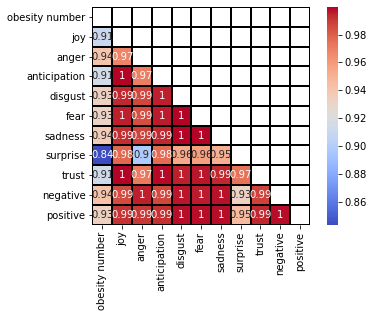

In [5]:
mask = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True,square=True,cmap= 'coolwarm', linewidths=1,linecolor='black',mask=mask)

#### Changing the matrix shape

<AxesSubplot:>

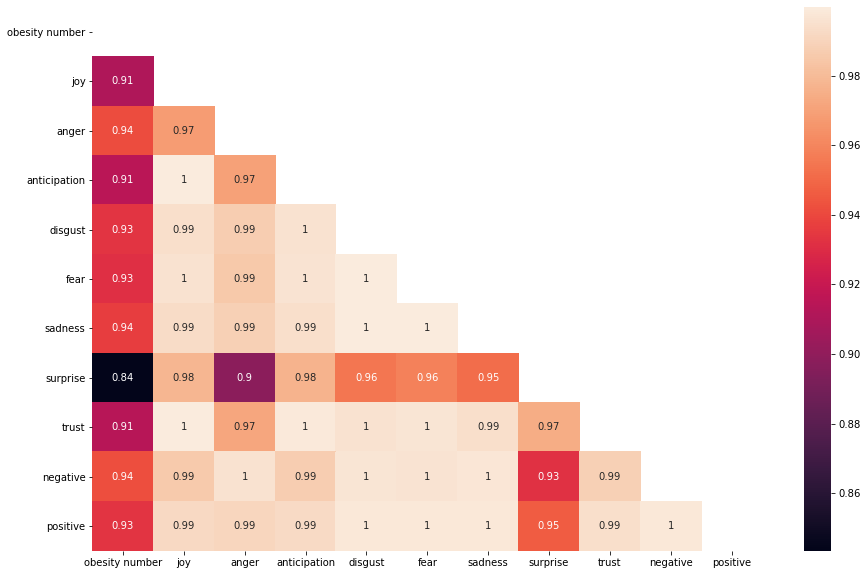

In [16]:
# plt.figure(figsize=(15, 10))
#matrix= np.zeros_like(new_df.corr())
#matrix[np.triu_indices_from(new_df.corr())] = True
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix)

<AxesSubplot:>

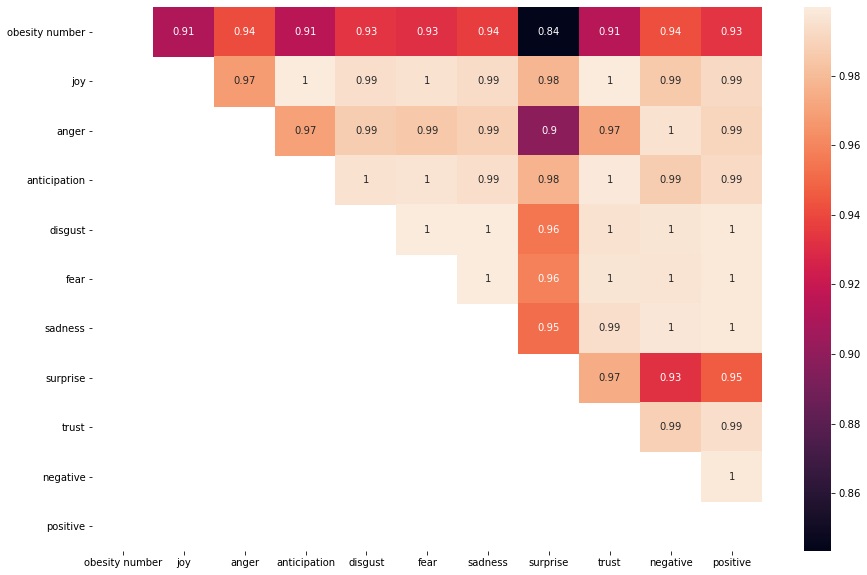

In [17]:
# plt.figure(figsize=(15, 10))
#matrix = np.ones_like(new_df.corr())
mask = np.tril(df.corr())
sns.heatmap(df.corr(), annot=True, mask=mask)